In [ ]:
#Install libraries
#nxviz: Composable and rational network visualizations in matplotlib
!pip install nxviz
#Gudhi topological data analysis library
!pip install gudhi
#This update might be necessary as Seaborn might create conflict with the latest version
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 37.1 MB/s 
     |████████████████████████████████| 930 kB 53.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.3 MB 1.4 MB/s 
Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

# Network and TDA Libraries
import networkx as nx
#from nxviz import CircosPlot
import community
import gudhi

/usr/local/lib/python3.7/dist-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


In [ ]:
matrix = np.genfromtxt('AveragedMatrix.txt')

In [ ]:
#load lables from Glasser atlas 
lineList = [line.rstrip('\n') for line in open('ROI_names.txt')]


In [ ]:
matrixdiagNaN = matrix.copy()
np.fill_diagonal(matrixdiagNaN,np.nan)
Pdmatrix = pd.DataFrame(matrixdiagNaN)
Pdmatrix.columns = lineList
Pdmatrix.index = lineList
Pdmatrix = Pdmatrix.sort_index(0).sort_index(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  


Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? n
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


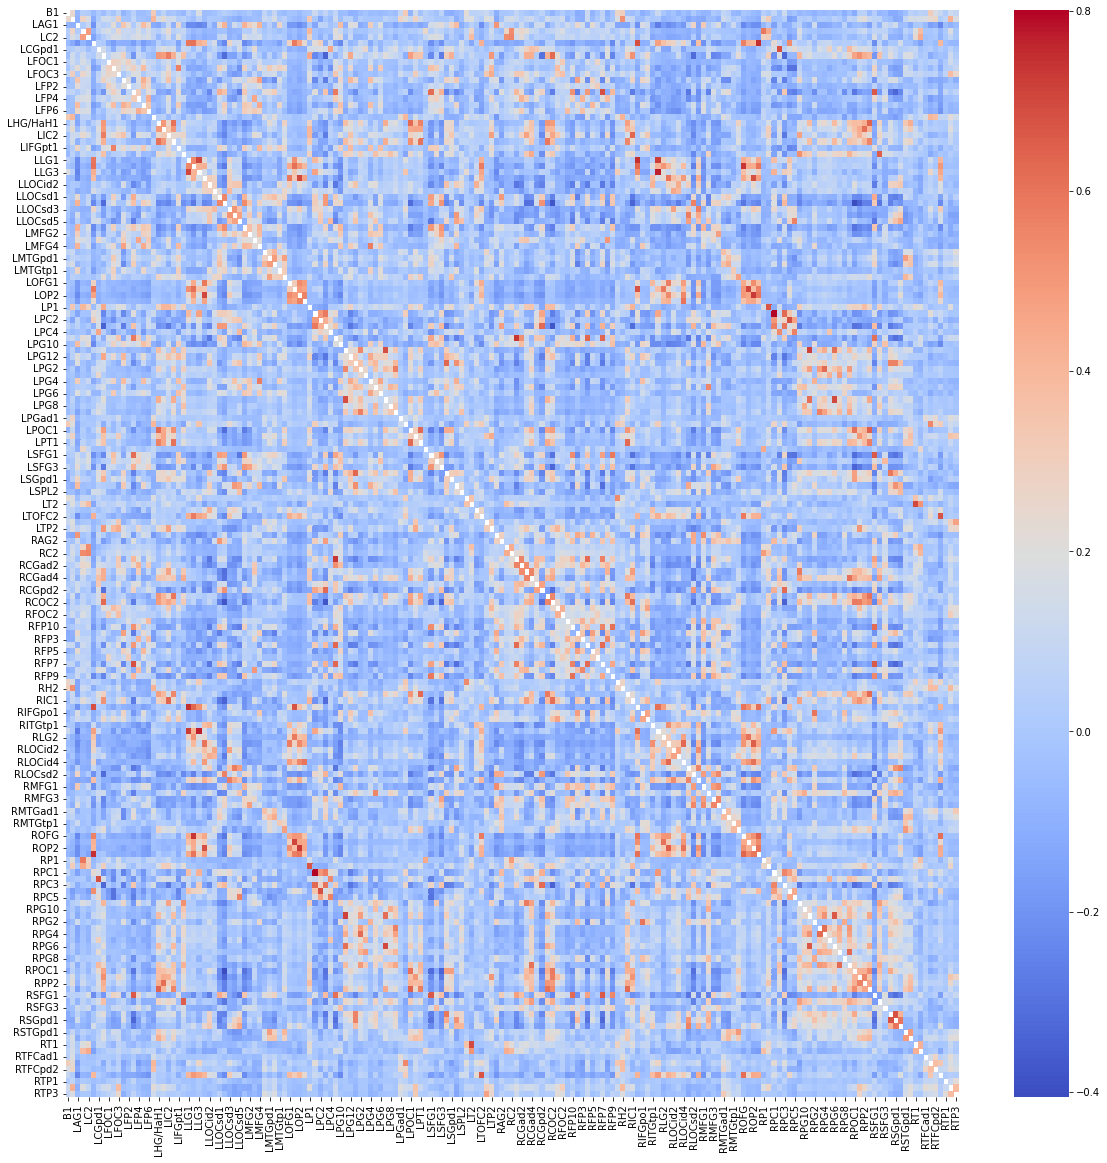

In [ ]:
 
# This mask variable gives you the possibility to plot only half of the correlation matrix. 
mask = np.zeros_like(Pdmatrix.values, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

# This command will show you the functional connectivity matrix with Seaborn
plt.figure(figsize = (20, 20))
_ = sns.heatmap(Pdmatrix, cmap='coolwarm', cbar=True, square=False, mask=None) # To apply the mask, change to mask=mask

In [ ]:
# Make all values absolute for further user (to simplify our lives in this tutorial)
matrix = abs(matrix)
matrixdiagNaN = abs(matrixdiagNaN)

In [ ]:
# Most used tools for connectivity metrics are BCTpy and NetworkX

# For NetworkX you need to convert the adjacency matrix in Graph object
# Creating a graph
G = nx.from_numpy_matrix(matrix)

# Removing self-loops (is this needed?)
G.remove_edges_from(list(nx.selfloop_edges(G)))

In [ ]:
# Review tradional graph metrics

# Computation of nodal degree/strength
#print(nx.degree.__doc__)

strength = G.degree(weight='weight')
strengths = {node: val for (node, val) in strength}
nx.set_node_attributes(G, dict(strength), 'strength') # Add as nodal attribute

# Normalized node strength values 1/N-1
normstrenghts = {node: val * 1/(len(G.nodes)-1) for (node, val) in strength}
nx.set_node_attributes(G, normstrenghts, 'strengthnorm') # Add as nodal attribute

# Computing the mean degree of the network
normstrengthlist = np.array([val * 1/(len(G.nodes)-1) for (node, val) in strength])
mean_degree = np.sum(normstrengthlist)/len(G.nodes)
print(mean_degree)

0.11425288701460302


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Counts')

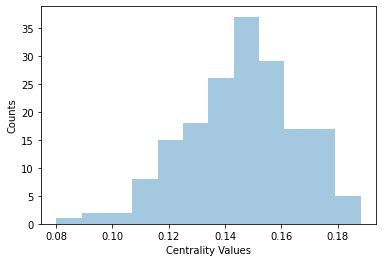

In [ ]:
# Closeness centrality
#print(nx.closeness_centrality.__doc__)

# The function accepts a argument 'distance' that, in correlation-based networks, must be seen as the inverse ... 
# of the weight value. Thus, a high correlation value (e.g., 0.8) means a shorter distance (i.e., 0.2).
G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}

# Then add them as attributes to the graph edges
nx.set_edge_attributes(G, G_distance_dict, 'distance')

# Computation of Closeness Centrality
closeness = nx.closeness_centrality(G, distance='distance')

# Now we add the closeness centrality value as an attribute to the nodes
nx.set_node_attributes(G, closeness, 'closecent')

# Visualise  values directly
#print(closeness)

# Closeness Centrality Histogram
sns.distplot(list(closeness.values()), kde=False, norm_hist=False)
plt.xlabel('Centrality Values')
plt.ylabel('Counts')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Counts')

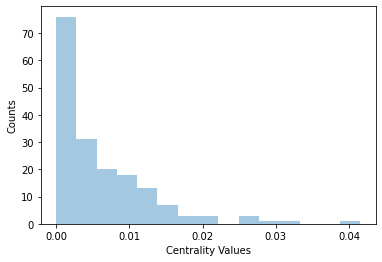

In [ ]:
# Betweenness centrality:
#print(nx.betweenness_centrality.__doc__)
betweenness = nx.betweenness_centrality(G, weight='distance', normalized=True) 
                                                                
# Now we add the it as an attribute to the nodes
#nx.set_node_attributes(G, betweenness, 'bc')

# Visualise  values directly
#print(betweenness)

# Betweenness centrality Histogram
sns.distplot(list(betweenness.values()), kde=False, norm_hist=False)
plt.xlabel('Centrality Values')
plt.ylabel('Counts')

In [ ]:
# Path Length
#print(nx.shortest_path_length.__doc__)

# This one can also be used if defining source and target: 
#print(nx.dijkstra_path_length.__doc__)
nx.dijkstra_path_length(G, source=20, target=25, weight='distance')

 

7.81691095077324

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Counts')

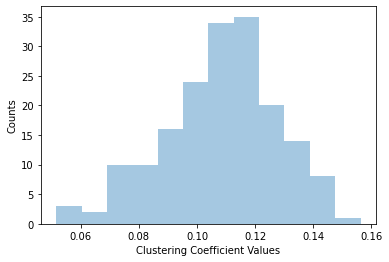

In [ ]:
# Clustering Coefficient
#print(nx.clustering.__doc__)
clustering = nx.clustering(G, weight='weight')

# Add as attribute to nodes
nx.set_node_attributes(G, clustering, 'cc')

# Visualise values directly
#print(clustering)

# Clustering Coefficient Histogram
sns.distplot(list(clustering.values()), kde=False, norm_hist=False)
plt.xlabel('Clustering Coefficient Values')
plt.ylabel('Counts')

usetex mode requires TeX.


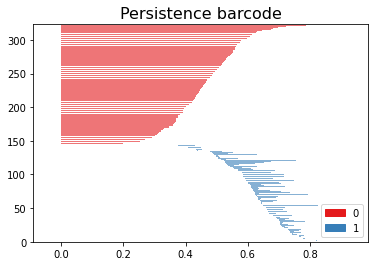

In [ ]:
#################################################################
# Topological Data Analysis part
# Gudhi has its own plot system

# Computation of persistence barcode   

# Converting to distance matrix
mattop = 1 - matrix
# Computing and plotting barcode
rips_complex = gudhi.RipsComplex(distance_matrix=mattop, max_edge_length=1)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence()
gudhi.plot_persistence_barcode(diag, legend=True, max_intervals=0)

Text(0, 0.5, 'Death')

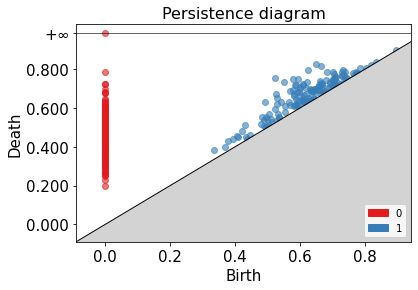

In [ ]:
# Persistence Diagram 
gudhi.plot_persistence_diagram(diag, legend=True, max_intervals=0)
plt.tick_params(axis='both', labelsize=15)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)

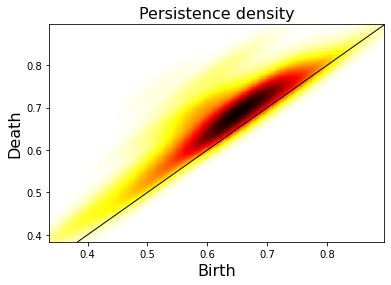

In [ ]:
# Persistence density plots
gudhi.plot_persistence_density(diag, dimension=1)

In [ ]:
# Import TDA functions from Eduarda Centeno & Fernando Santos
%run "TDA.py"

<Figure size 432x288 with 0 Axes>

/content/TDA.py:468: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_thr(i, maxvalue, 0))))


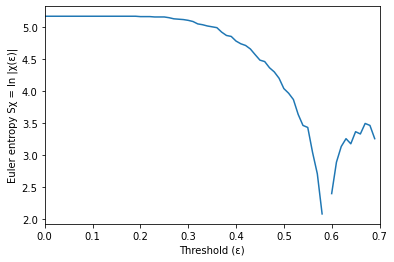

In [ ]:
# Euler entropy (Sχ = ln|χ|) as a function of the correlation threshold level.
plotEuler_thr(matrix, 70)

In [ ]:
# Obtaining the value of curvature for each node at a specific threshold and creating a dictionary with brain region names.
curvalues = Curv_thr(i=matrix, e=0.7)
dict(zip(lineList, curvalues))

{'B1': 0.16666666666666652,
 'LA1': -0.5,
 'LAG1': -0.20000000000000262,
 'LC1': -0.08333333333333348,
 'LC2': 0.0,
 'LCC1': 0.07745310245286435,
 'LCGpd1': -0.08333333333333348,
 'LCOC1': -0.02373737373822056,
 'LFOC1': 0.5,
 'LFOC2': -1.666666666666667,
 'LFOC3': -0.6666666666666665,
 'LFP1': -0.26666666666666694,
 'LFP2': 0.0,
 'LFP3': -0.3317460317460195,
 'LFP4': -0.21666666666666695,
 'LFP5': -1.3666666666666687,
 'LFP6': -0.666666666666667,
 'LH1': -0.08333333333333348,
 'LHG/HaH1': -0.028932178932914138,
 'LIC1': -0.010281385281718652,
 'LIC2': -0.2202380952381393,
 'LIC3': -0.013888888889455414,
 'LIFGpt1': -0.050000000000001765,
 'LJLC/SMC1': 0.07619047619047609,
 'LLG1': 0.023051948052094512,
 'LLG2': 0.011616161614951936,
 'LLG3': -0.17575757575752762,
 'LLOCid1': -0.03524531024556926,
 'LLOCid2': -0.4666666666666679,
 'LLOCid3': 0.16666666666666663,
 'LLOCsd1': 0.0682539682539604,
 'LLOCsd2': -0.5214285714286673,
 'LLOCsd3': -0.38333333333333713,
 'LLOCsd4': -0.38333333333

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Counts')

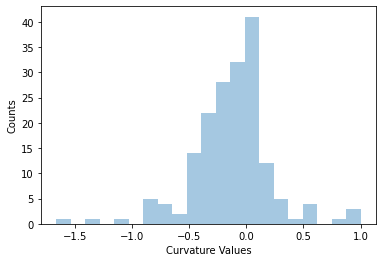

In [ ]:
# Histogram for curvature distribution at a specific threshold.
sns.distplot(curvalues, kde=False, norm_hist=False)
plt.xlabel('Curvature Values')
plt.ylabel('Counts')

In [ ]:
# Obtaining the value of curvature for each node at a specific density and creating a dictionary with brain region names.
curvals_den = Curv_density(i=matrix, d=0.15)
#dict(zip(lineList, curvals_den))

In [ ]:
# Obtaining the value of curvature for each node at a specific density and creating a dictionary with brain region names.
curvals_den = Curv_density(i=matrix, d=0.15)
#dict(zip(lineList, curvals_den))